In [1]:
from skimage import morphology
from scipy import ndimage
from PIL import ImageDraw
from os import listdir
import PIL
import skimage
import PIL.ImageOps

# This notebook shows entire preprocessing of images

## 1. Set PATHS of  images

In [2]:
PATHS = ['D:/jupyter_notebooks/imgs/nor_new/',
        'D:\jupyter_notebooks\imgs\err_new/']

In [3]:
nor_dir_file = len(listdir(PATHS[0]))
err_dir_file = len(listdir(PATHS[1]))
print('num of files are : ' + str(nor_dir_file + err_dir_file))

num of files are : 142


## 2. Set formats to get list of only format files

In [4]:
get_files = listdir(PATHS[0])
get_files.sort()
real_imgs = []
formats = ['.jpg','.JPG']

for i,filen in enumerate(get_files):
    for formatn in formats:
        if filen.find(formatn) != -1:
            print(i,get_files[i])
            real_imgs.append(get_files[i])


0 IMG_1691.JPG
1 IMG_1694.JPG
2 IMG_1695.JPG
3 IMG_1696.JPG
4 IMG_1698.JPG
5 IMG_1699.JPG
6 IMG_1700.JPG
7 IMG_1701.JPG
8 IMG_1702.JPG
9 IMG_1705.JPG
10 IMG_1706.JPG
11 IMG_1713.JPG
12 IMG_1714.JPG
13 IMG_1715.JPG
14 IMG_1716.JPG
15 IMG_1717.JPG
16 IMG_1724.JPG
17 IMG_1728.JPG
18 IMG_1736.JPG
19 IMG_1740.JPG
20 IMG_1742.JPG
21 IMG_1744.JPG
22 IMG_1745.JPG
23 IMG_1746.JPG
24 IMG_1757.JPG
25 IMG_1758.JPG
26 IMG_1763.JPG
27 IMG_1775.JPG
28 IMG_1776.JPG
29 IMG_1777.JPG
30 IMG_1792.JPG
31 IMG_1793.JPG
32 IMG_1794.JPG
33 IMG_1795.JPG
34 IMG_1796.JPG
35 IMG_1797.JPG
36 IMG_1798.JPG
37 IMG_1799.JPG
38 IMG_1800.JPG
39 IMG_1801.JPG
40 IMG_1802.JPG
41 IMG_1951.JPG
42 IMG_1953.JPG
43 n01 (1).jpg
44 n01 (10).jpg
45 n01 (11).jpg
46 n01 (12).jpg
47 n01 (13).jpg
48 n01 (15).jpg
49 n01 (16).jpg
50 n01 (17).jpg
51 n01 (18).jpg
52 n01 (19).jpg
53 n01 (2).jpg
54 n01 (21).jpg
55 n01 (22).jpg
56 n01 (23).jpg
57 n01 (24).jpg
58 n01 (25).jpg
59 n01 (4).jpg
60 n01 (5).jpg
61 n01 (6).jpg
62 n01 (7).jpg
63 n01 (

In [5]:
## Make PIL.Image object binarize
def make_bw (x):
    img_bw= x.point(lambda c : 255 if c >127 else 0)
    return img_bw

In [6]:
img = PATHS[0] + real_imgs[4]
img_pil = PIL.Image.open(img)
img_arr = np.array(img_pil)

## 3. Control Gamma of images to get rid of noise

In [7]:
img_3 = img_pil.point(lambda x : x+60 if x > 110 else x).point(lambda x : 255*(x/255)**3)
img_8 = img_pil.point(lambda x : x+60 if x > 110 else x).point(lambda x : 255*(x/255)**8)
img_13 = img_pil.point(lambda x : x+60 if x > 110 else x).point(lambda x : 255*(x/255)**13)

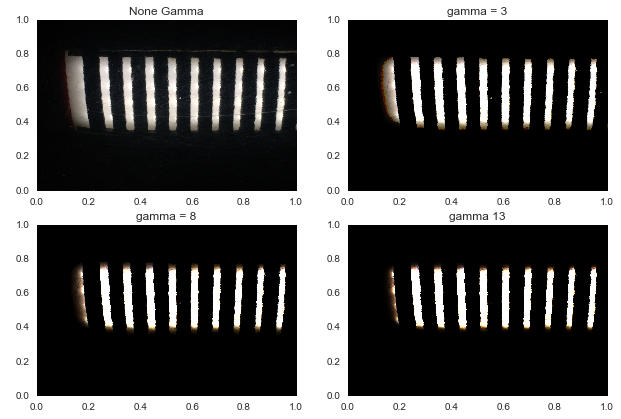

In [8]:
fig,axes = plt.subplots(2,2)
((ax1, ax2), (ax3, ax4)) = axes

fig.add_subplot(221,label = 'None Gamma')
plt.imshow(img_arr)
ax1.set_title('None Gamma')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(222,label = 'gamma = 3')
plt.imshow(np.array(img_3))
ax2.set_title('gamma = 3')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(223,label = 'gamma = 8')
plt.imshow(np.array(img_8))
ax3.set_title( 'gamma = 8')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(224,label ='gamma 13')
plt.imshow(np.array(img_13))
ax4.set_title('gamma 13')
plt.axis('off')
plt.axis('tight')

fig.subplots_adjust(left=0.01,top=0.95,bottom = 0,right=1)

## 4. Channel histogram of images

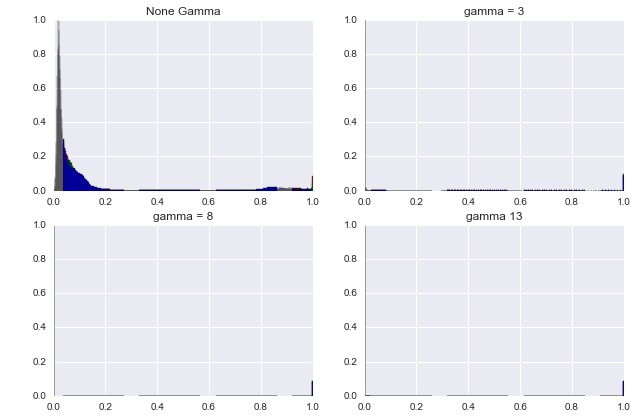

In [9]:
fig,axes = plt.subplots(2,2)
fig.figure = (15,30)
((ax1, ax2), (ax3, ax4)) = axes

fig.add_subplot(221,label = 'None Gamma')
plt.bar(range(256), img_pil.histogram()[:256],color= 'r')
plt.bar(range(256), img_pil.histogram()[256:512],color= 'g')
plt.bar(range(256), img_pil.histogram()[512:768],color= 'b')
ax1.set_title('None Gamma')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(222,label = 'gamma = 3')
plt.bar(range(256), img_3.histogram()[:256],color= 'r')
plt.bar(range(256), img_3.histogram()[256:512],color= 'g')
plt.bar(range(256), img_3.histogram()[512:768],color= 'b')
ax2.set_title('gamma = 3')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(223,label = 'gamma = 8')
plt.bar(range(256), img_8.histogram()[:256],color= 'r')
plt.bar(range(256), img_8.histogram()[256:512],color= 'g')
plt.bar(range(256), img_8.histogram()[512:768],color= 'b')
ax3.set_title( 'gamma = 8')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(224,label ='gamma 13')
plt.bar(range(256), img_13.histogram()[:256],color= 'r')
plt.bar(range(256), img_13.histogram()[256:512],color= 'g')
plt.bar(range(256), img_13.histogram()[512:768],color= 'b')
ax4.set_title('gamma 13')
plt.axis('off')
plt.axis('tight')

fig.subplots_adjust(left=0.01,top=0.95,bottom = 0,right=1)


## 5. Convert to greyscale

In [10]:
img_pilc = img_pil.convert('L')
img_3c = img_3.convert('L')
img_8c = img_8.convert('L')
img_13c = img_13.convert('L')

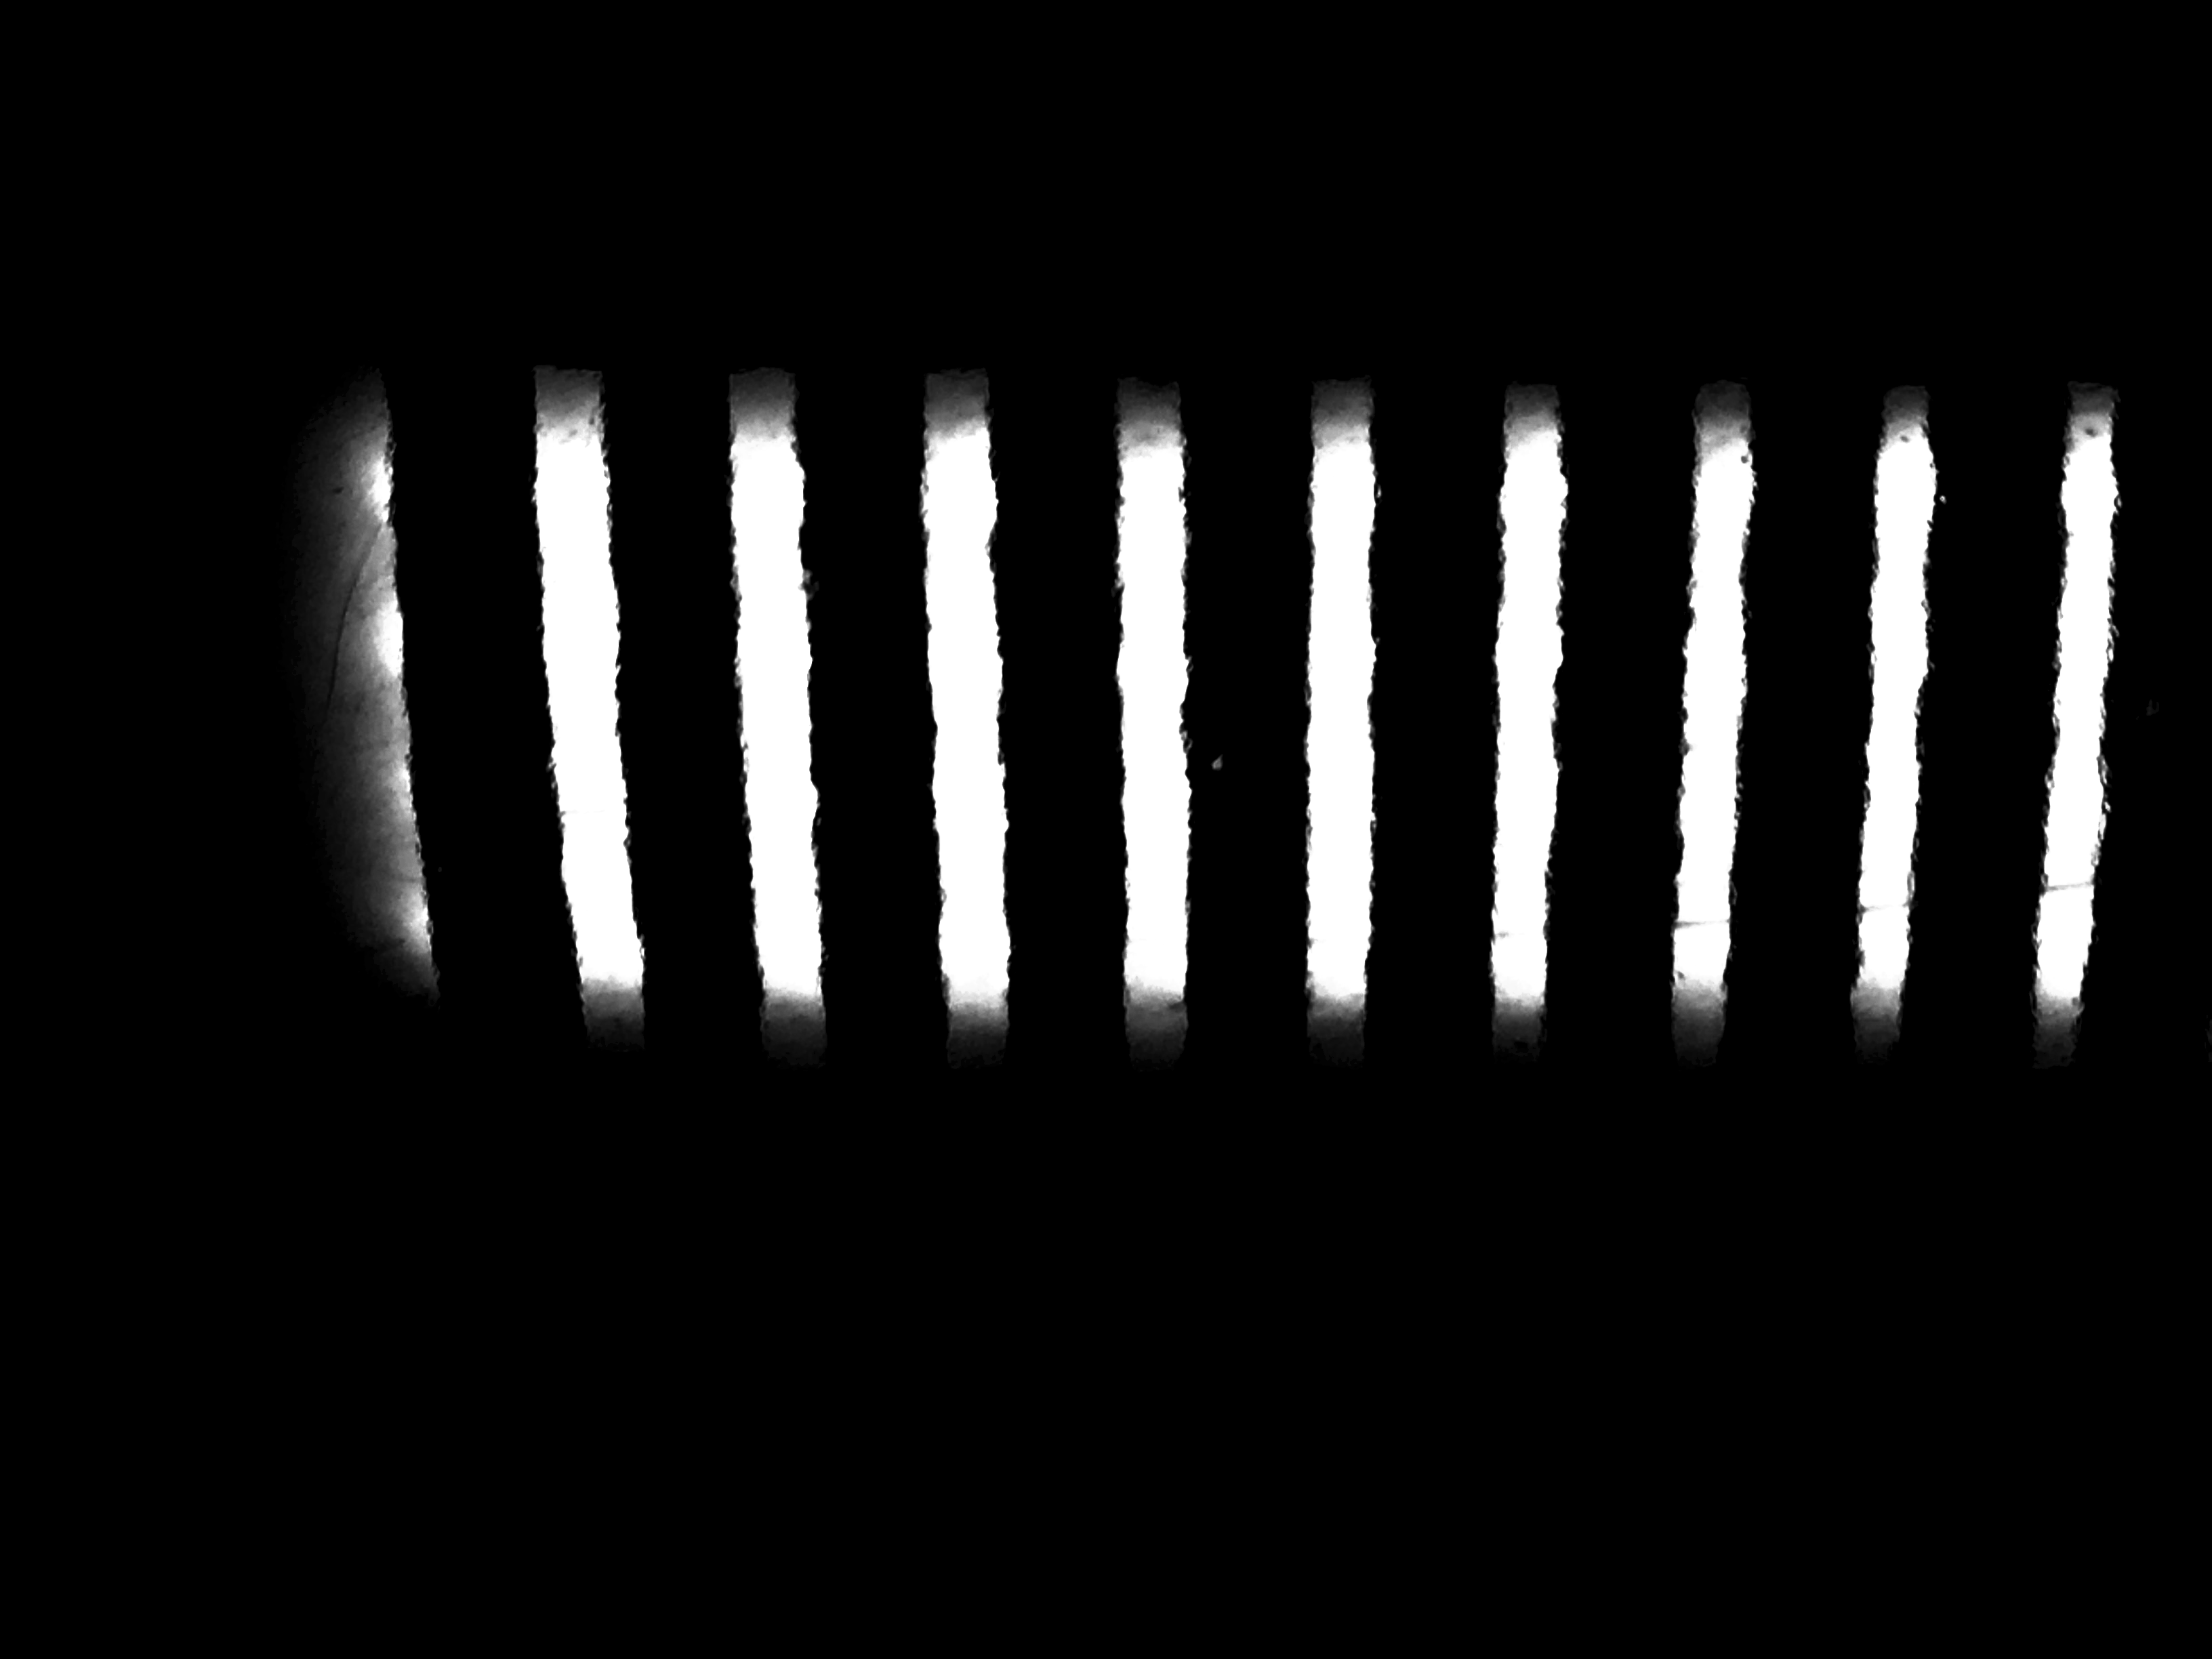

In [11]:
img_8c

## 6. Do Openning process and binarzie

### 6.1. Define morphological openning manually

In [12]:
def grey_ero_dil (img,iterat = 1, n_ero = 30, n_dil=35):
    for i in range(iterat):
        
        img_e = ndimage.grey_erosion(img, n_ero)
        #,structure=[[0,1,2],[0,2,0],[1,2,0]]
        img_er= ndimage.grey_dilation(img_e, n_dil)

    return img_er

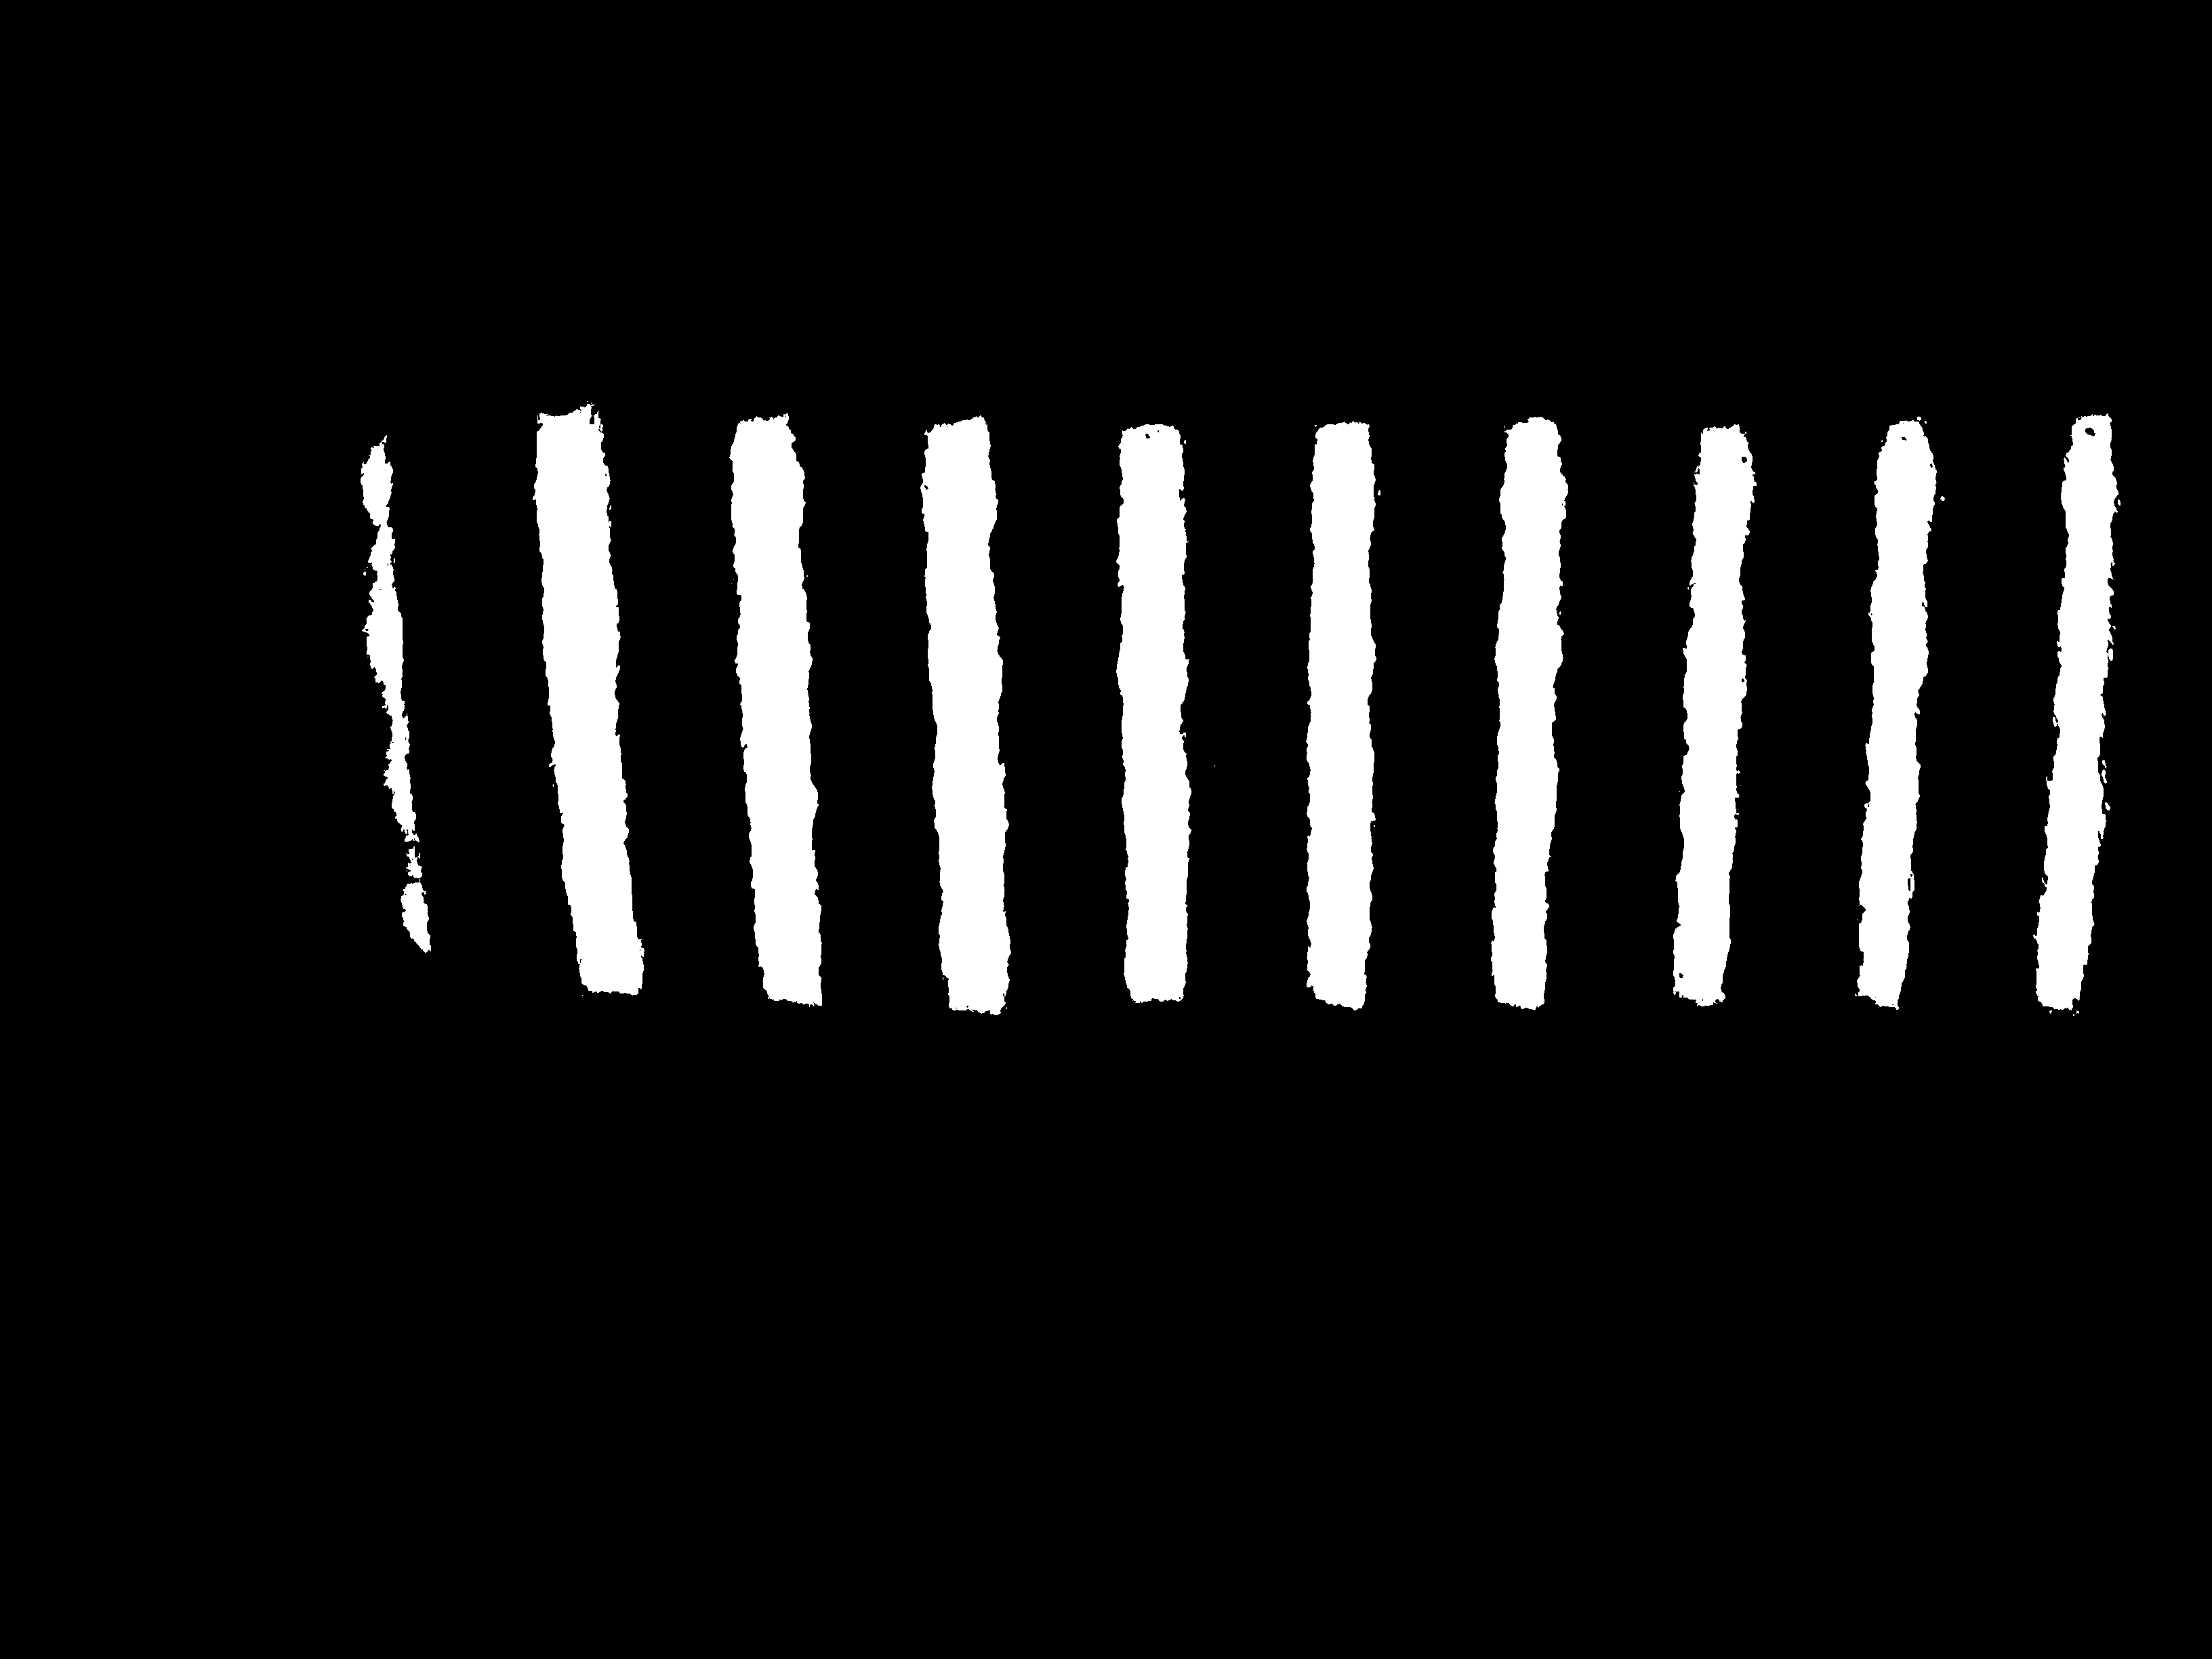

In [13]:
img_8cb = make_bw(img_8c)
img_8cb

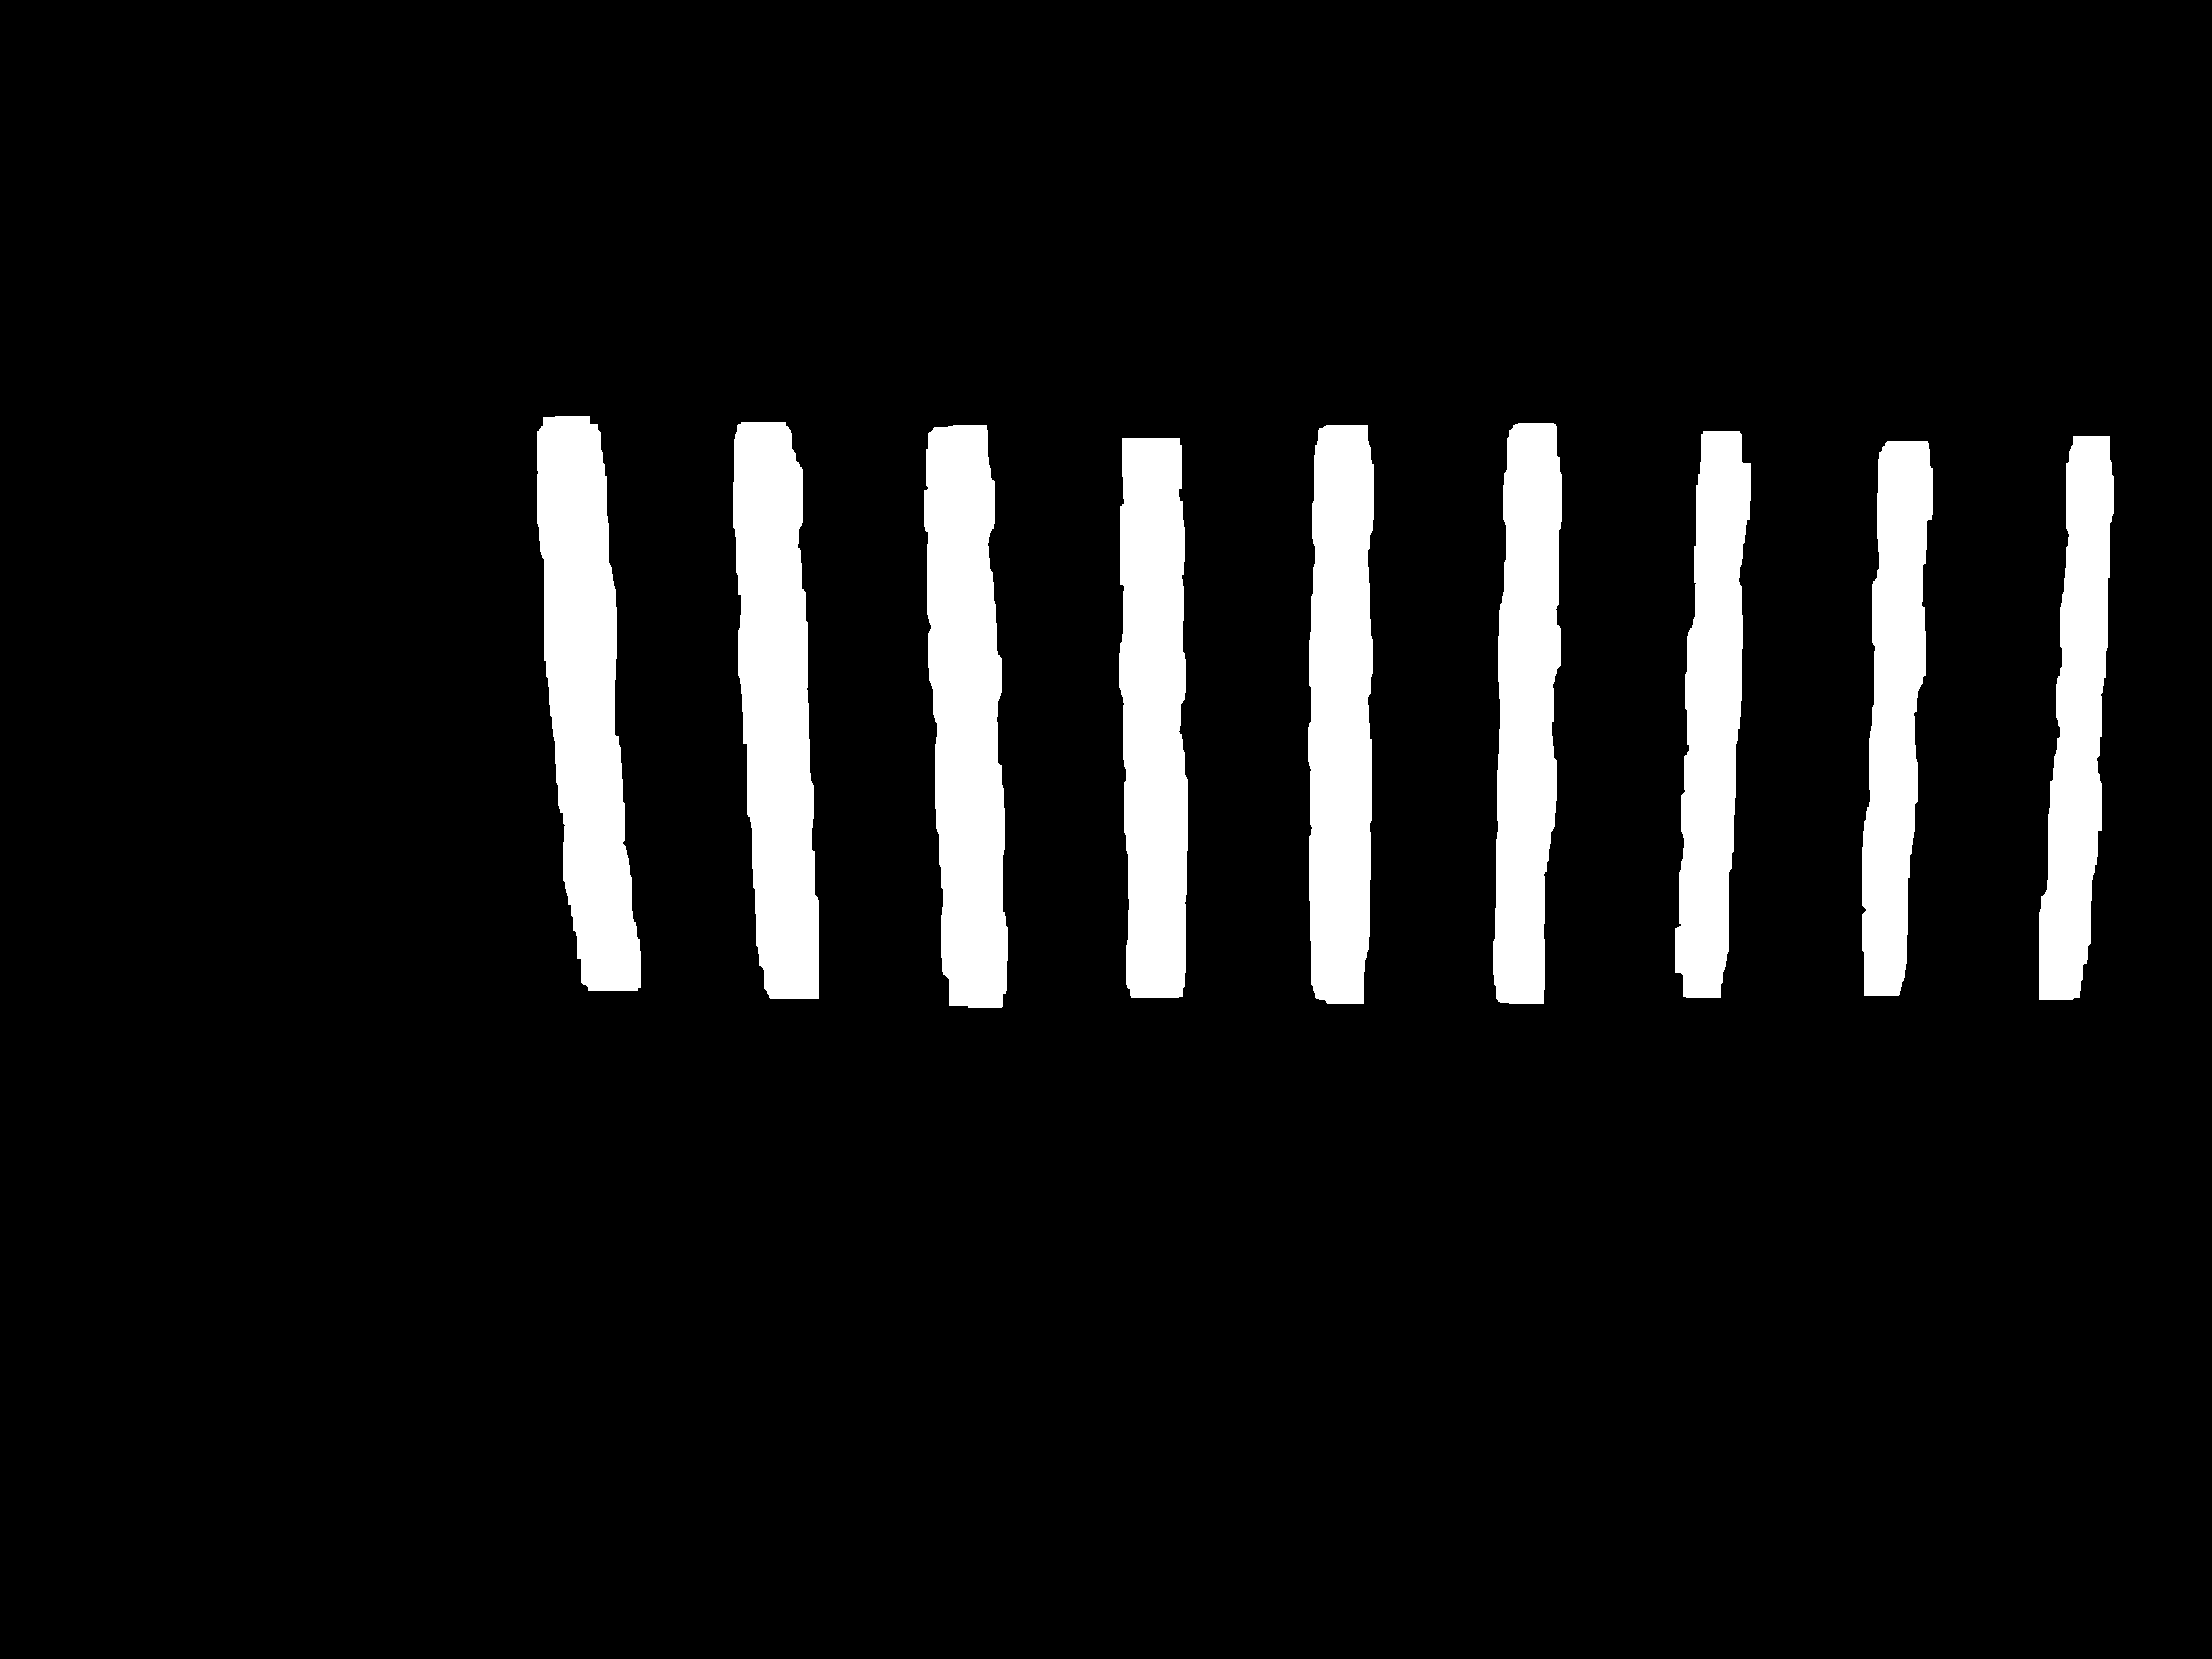

In [14]:
# from img_8c image do manual opening can manage params each level
img_8cmob = PIL.Image.fromarray(grey_ero_dil(img_8cb,1,50,50))
img_8cmob

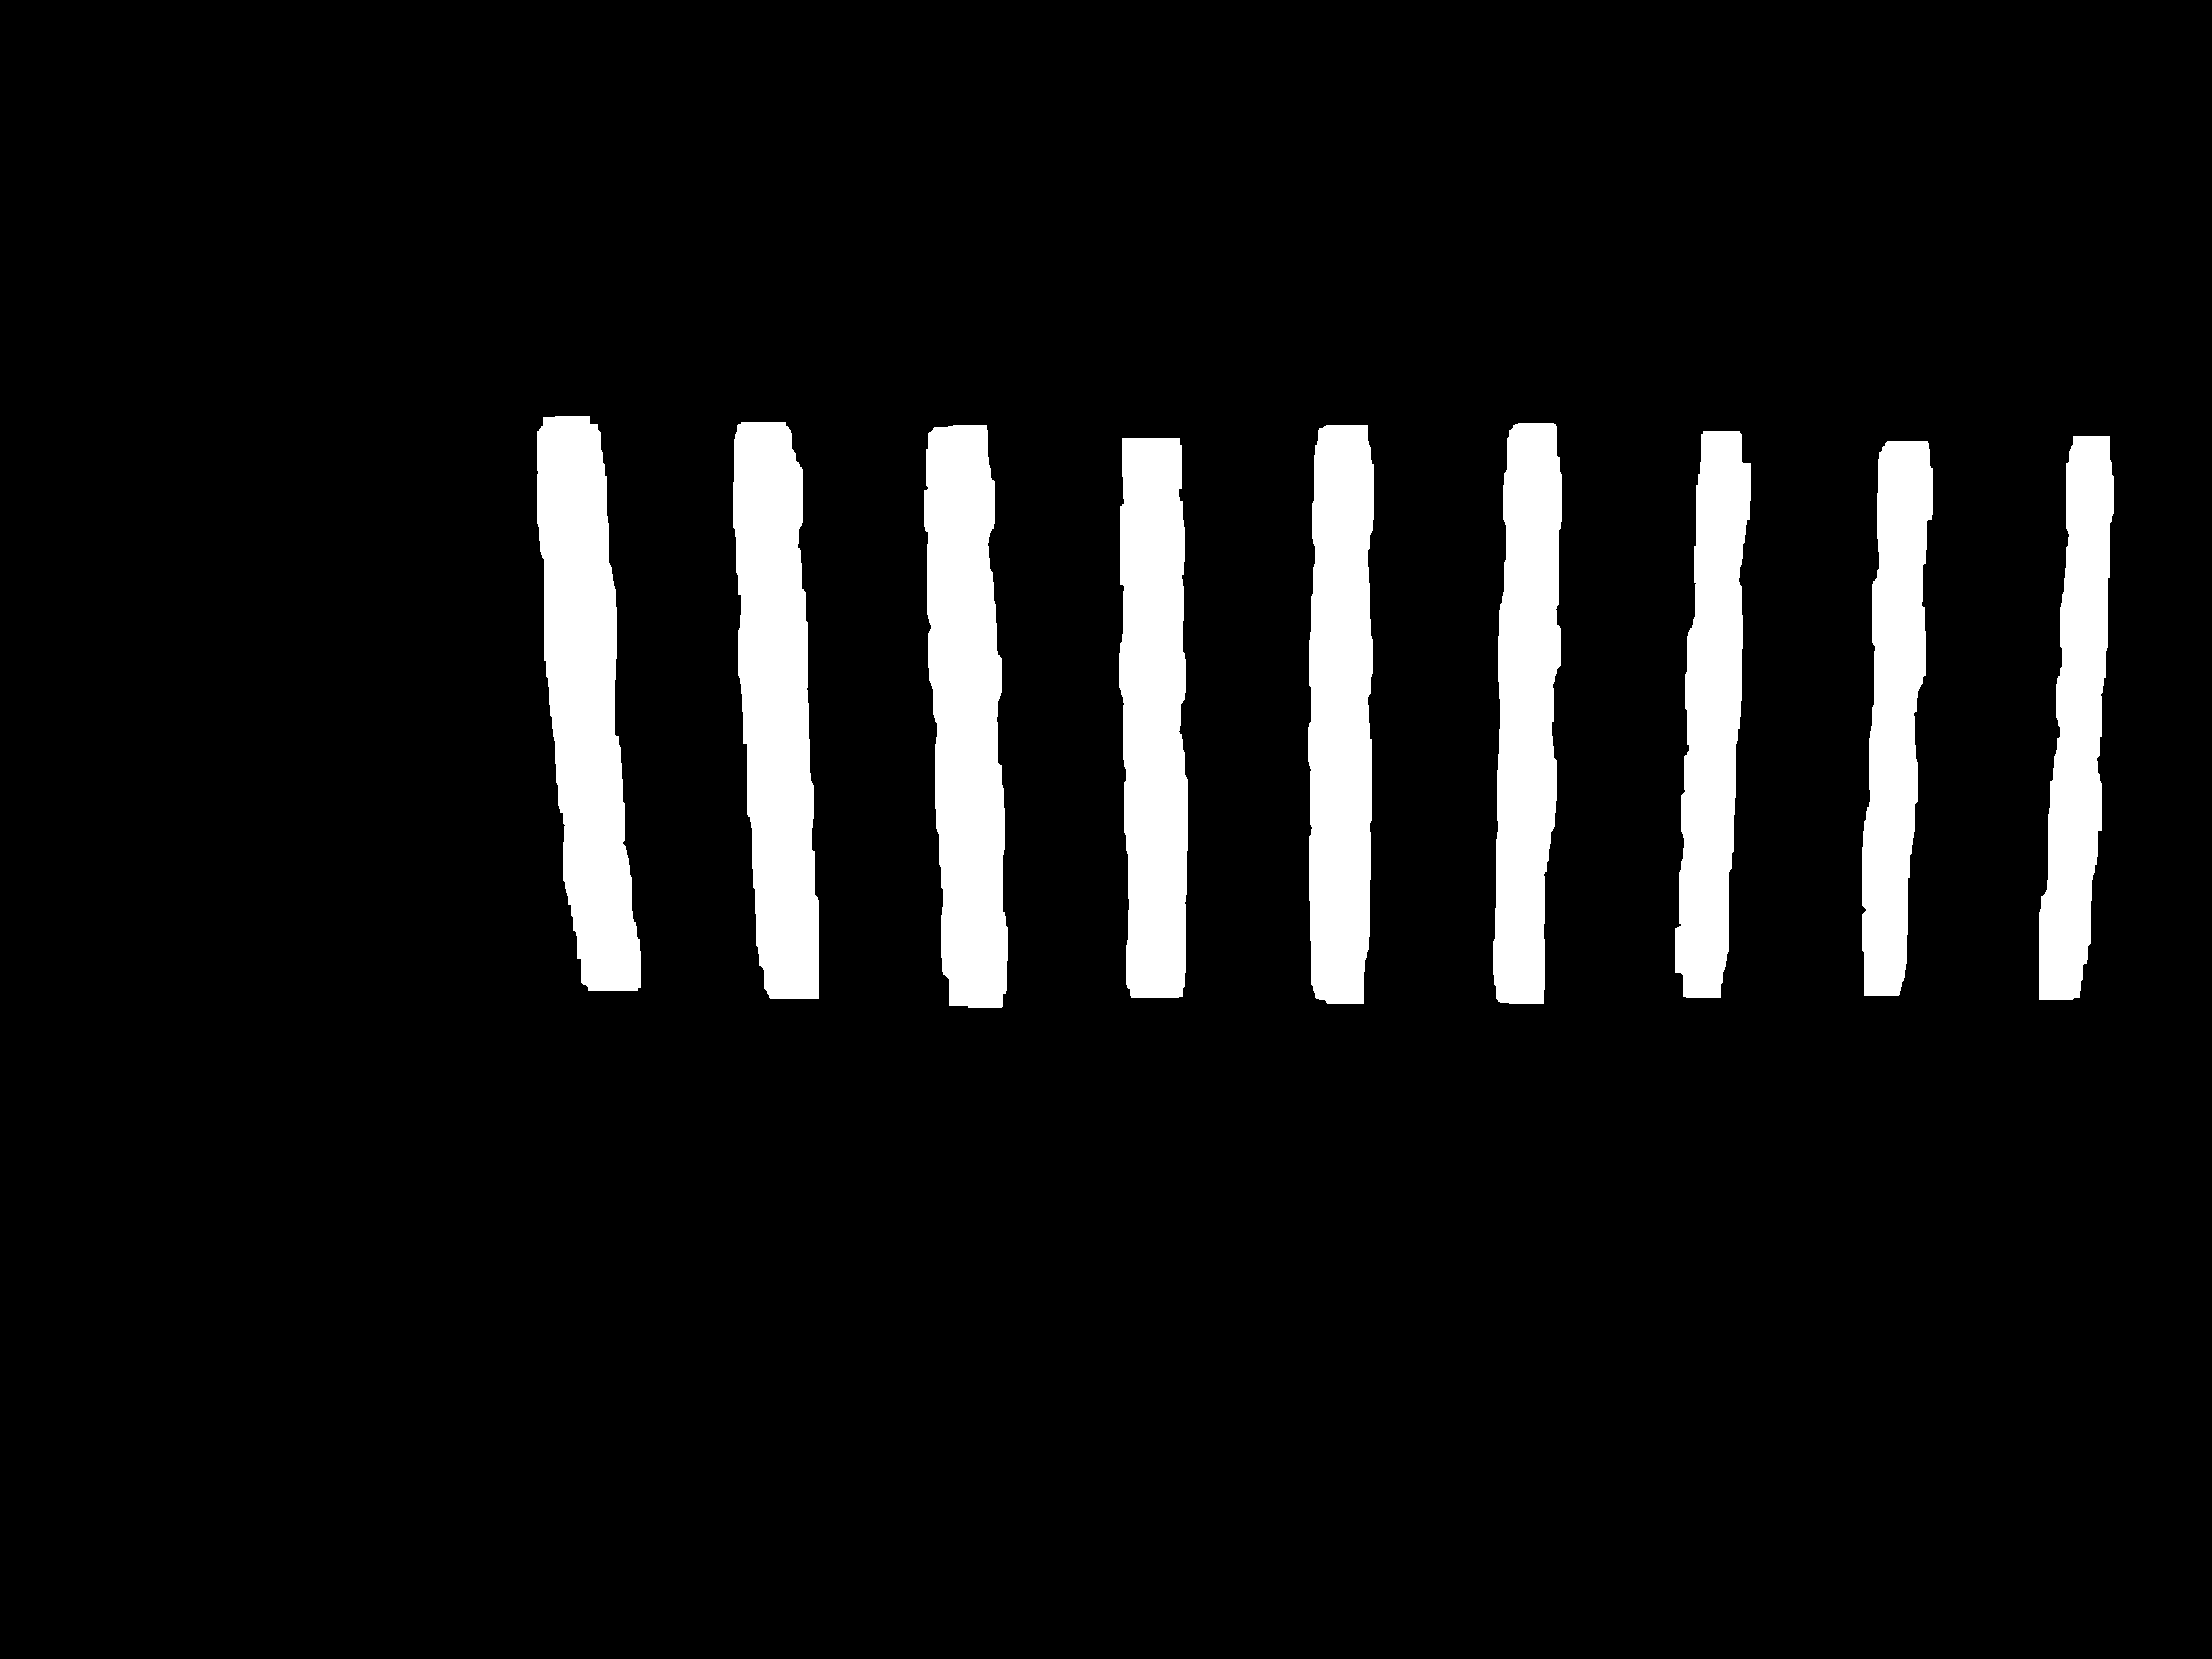

In [15]:
# built-in method : opening() it proceed with erosion = 50 , dilation : 50 it cant cutomize each step
img_8cob2 = PIL.Image.fromarray(ndimage.grey_opening(img_8cb,50))
img_8cob2

## 7. Find edge

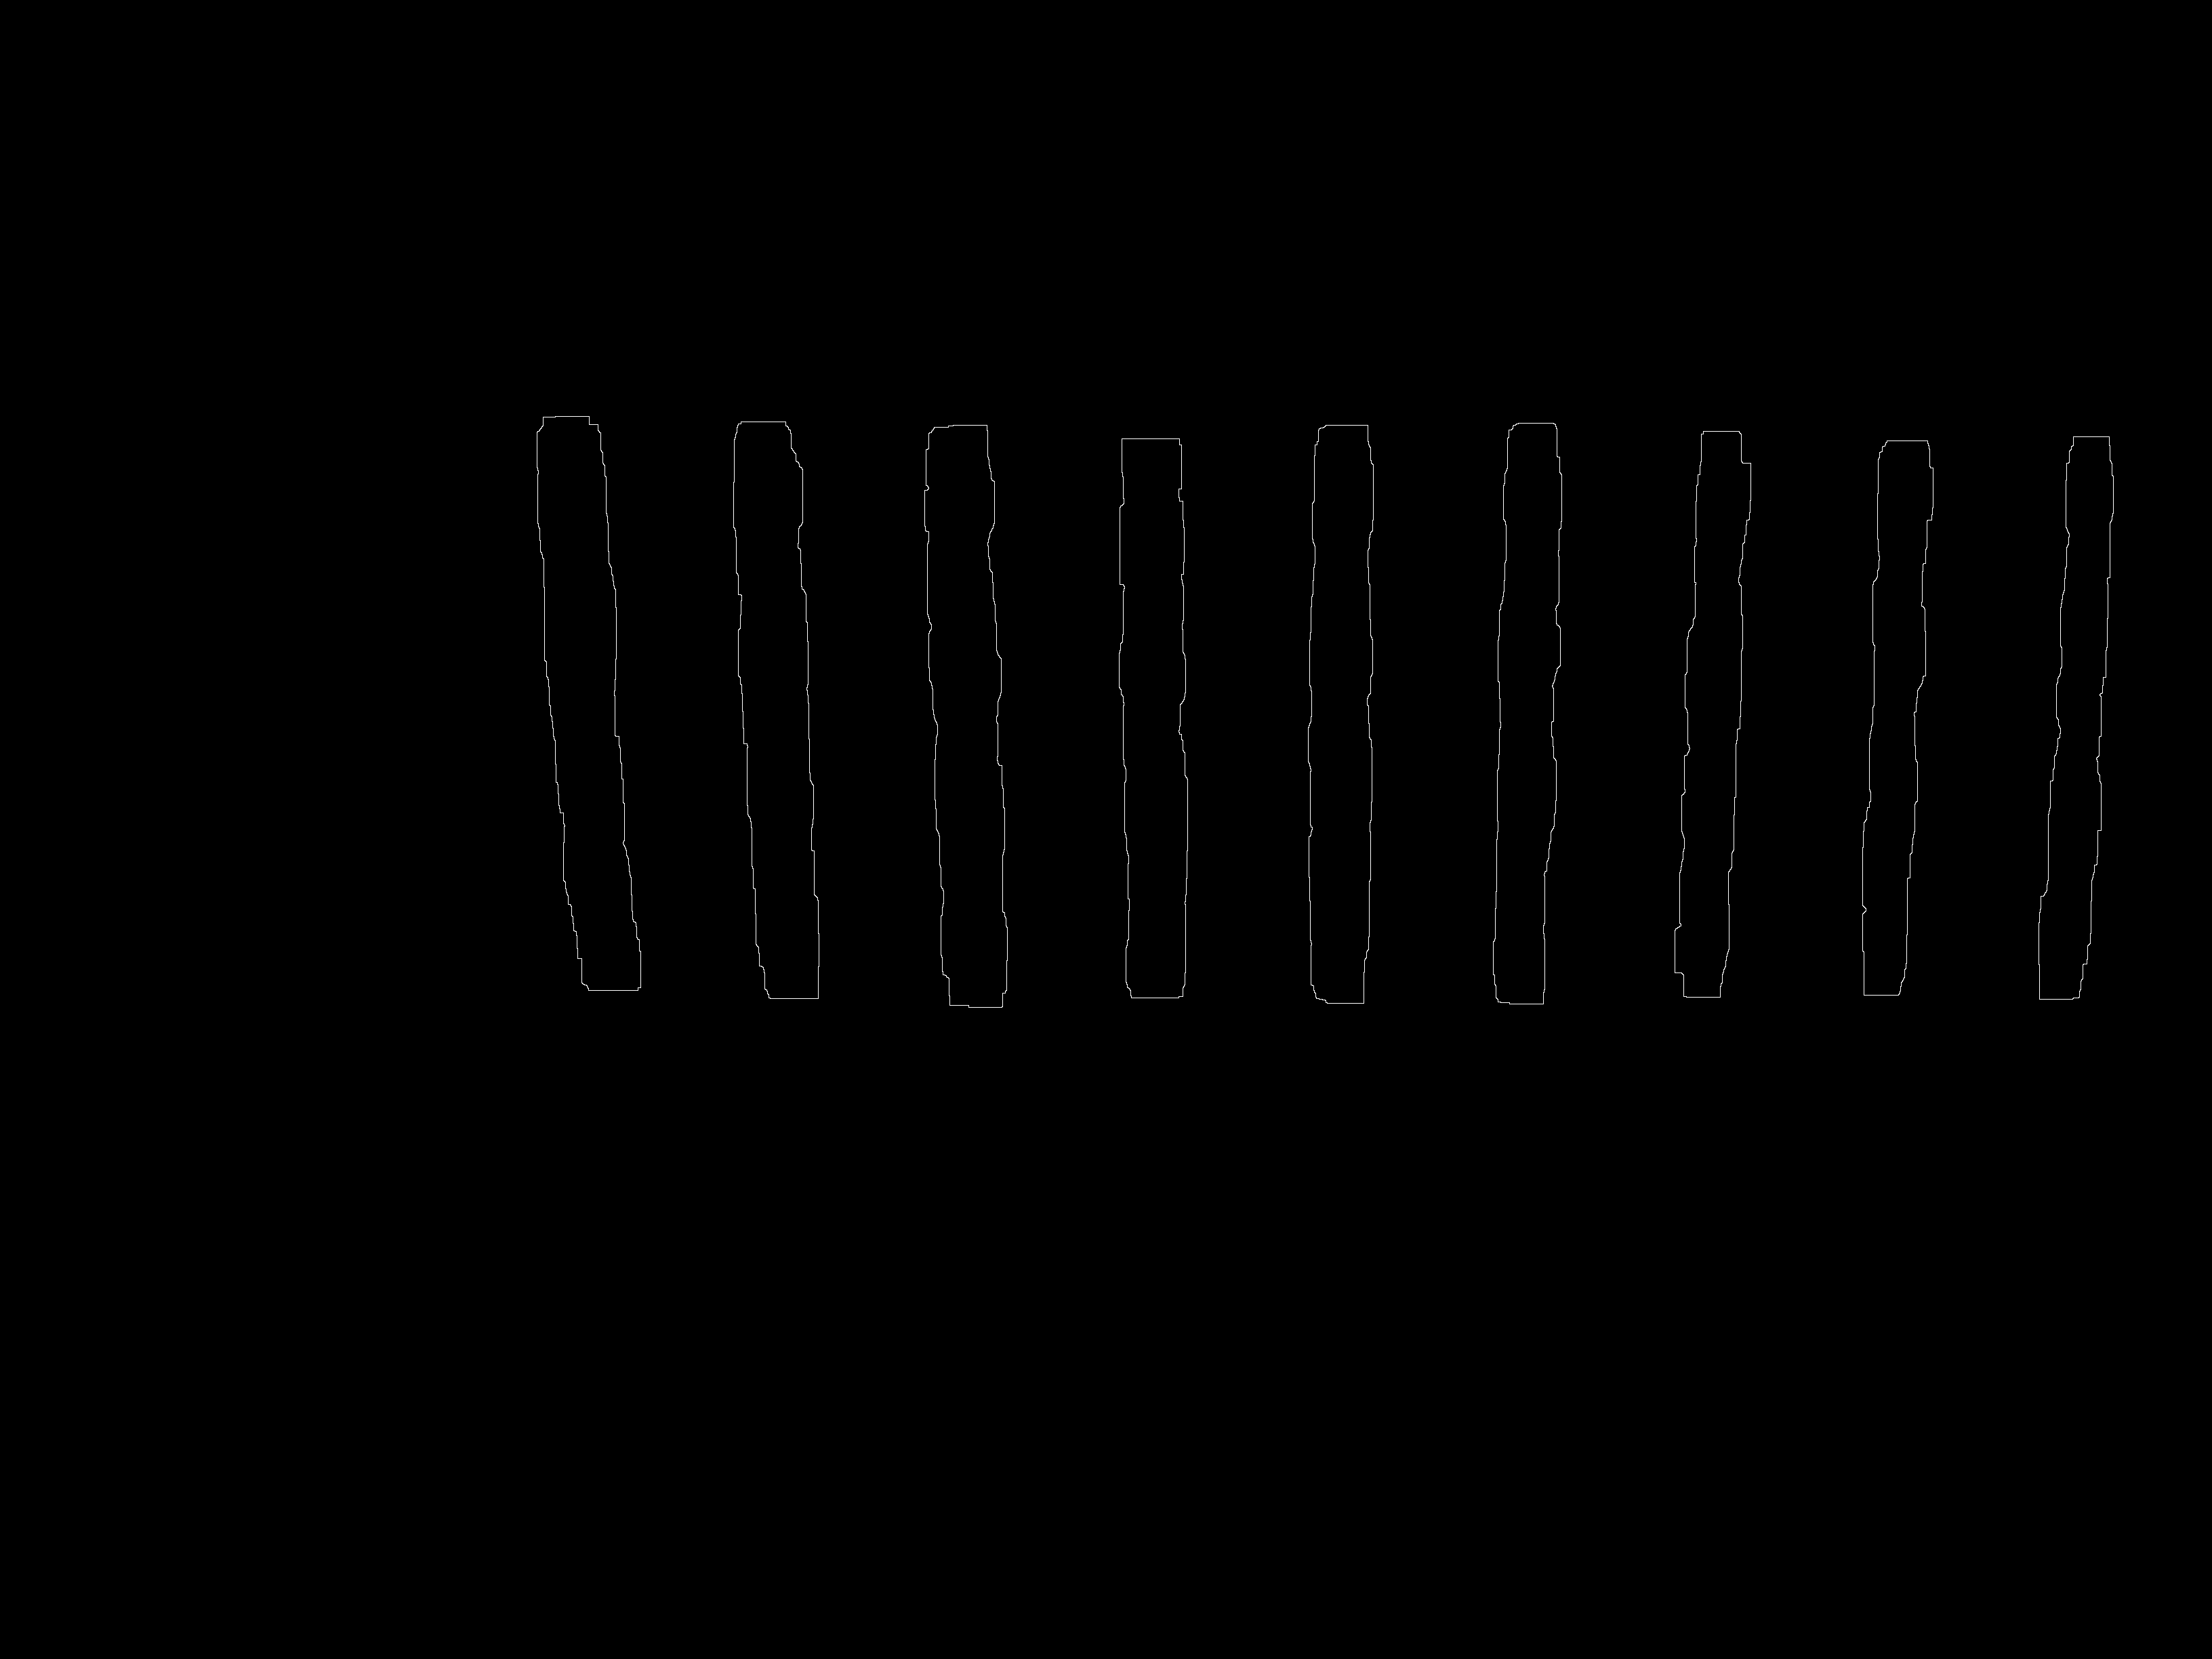

In [16]:
img_edge = img_8cmob.filter(PIL.ImageFilter.FIND_EDGES())
img_edge

### Count objets to verify clear image. going to use this on getting $n$  of objects

In [17]:
foot = [[1,1,1],[1,0,1],[1,1,1]]
z,x = ndimage.measurements.label(img_8cmob,foot)
z,x

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 9)

In [18]:
print('We found ',x,' object')

We found  9  object


(-0.5, 3263.5, 2447.5, -0.5)

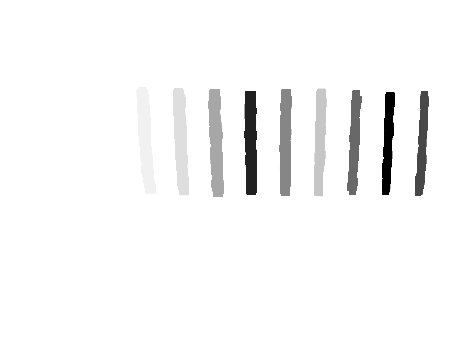

In [19]:
plt.imshow(z)
plt.axis('off')

### we can deal the objects with 0 ~ max(number objects we found)

(-0.5, 3263.5, 2447.5, -0.5)

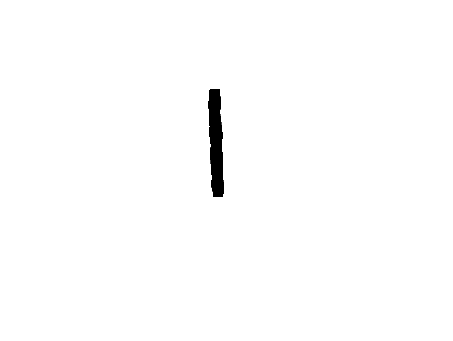

In [20]:
plt.imshow(z==4)
plt.axis('off')

## 8. Get rectangular to crop

### Compare method with library-built-in (PIL.Image.getbbox()) : finding rect()

In [21]:
def find_rect(x,margin = 0):
    '''return left upper right bottom'''
    ##TODO: margin을 percentile 로 적용

    rect = []
    x_sum_1=x.sum(axis=1)
    x_sum_0=x.sum(axis=0)
    for j,i in  enumerate(x_sum_0):
        if i != x_sum_0[1] & i != 0 :
            print("left is ",j)
            rect.append(j-margin)
            break
    for j,i in  enumerate(x_sum_1):
        if i != x_sum_1[1] & i != 0:
            print("upper is ",j)
            rect.append(j-margin)
            break

    for j,i in  enumerate(reversed(x_sum_0)):
        if i != x_sum_0[-2] & i != 0:
            print("right is ",x.shape[1]-j)
            rect.append(x.shape[1]-j+margin)
            break

    for j,i in  enumerate(reversed(x_sum_1)):
        if i != x_sum_1[-2] & i != 0:
            print("bottom is ",x.shape[0]-j)
            rect.append(x.shape[0]-j+margin)
            break
    return rect

In [22]:
rect = find_rect(np.array(PIL.ImageOps.invert(img_edge)))

left is  792
upper is  614
right is  3119
bottom is  1487


In [23]:
img_edge.getbbox()

(792, 614, 3119, 1487)

### Visualize the rectangular

In [24]:
img_d = ImageDraw.Draw(img_8c)

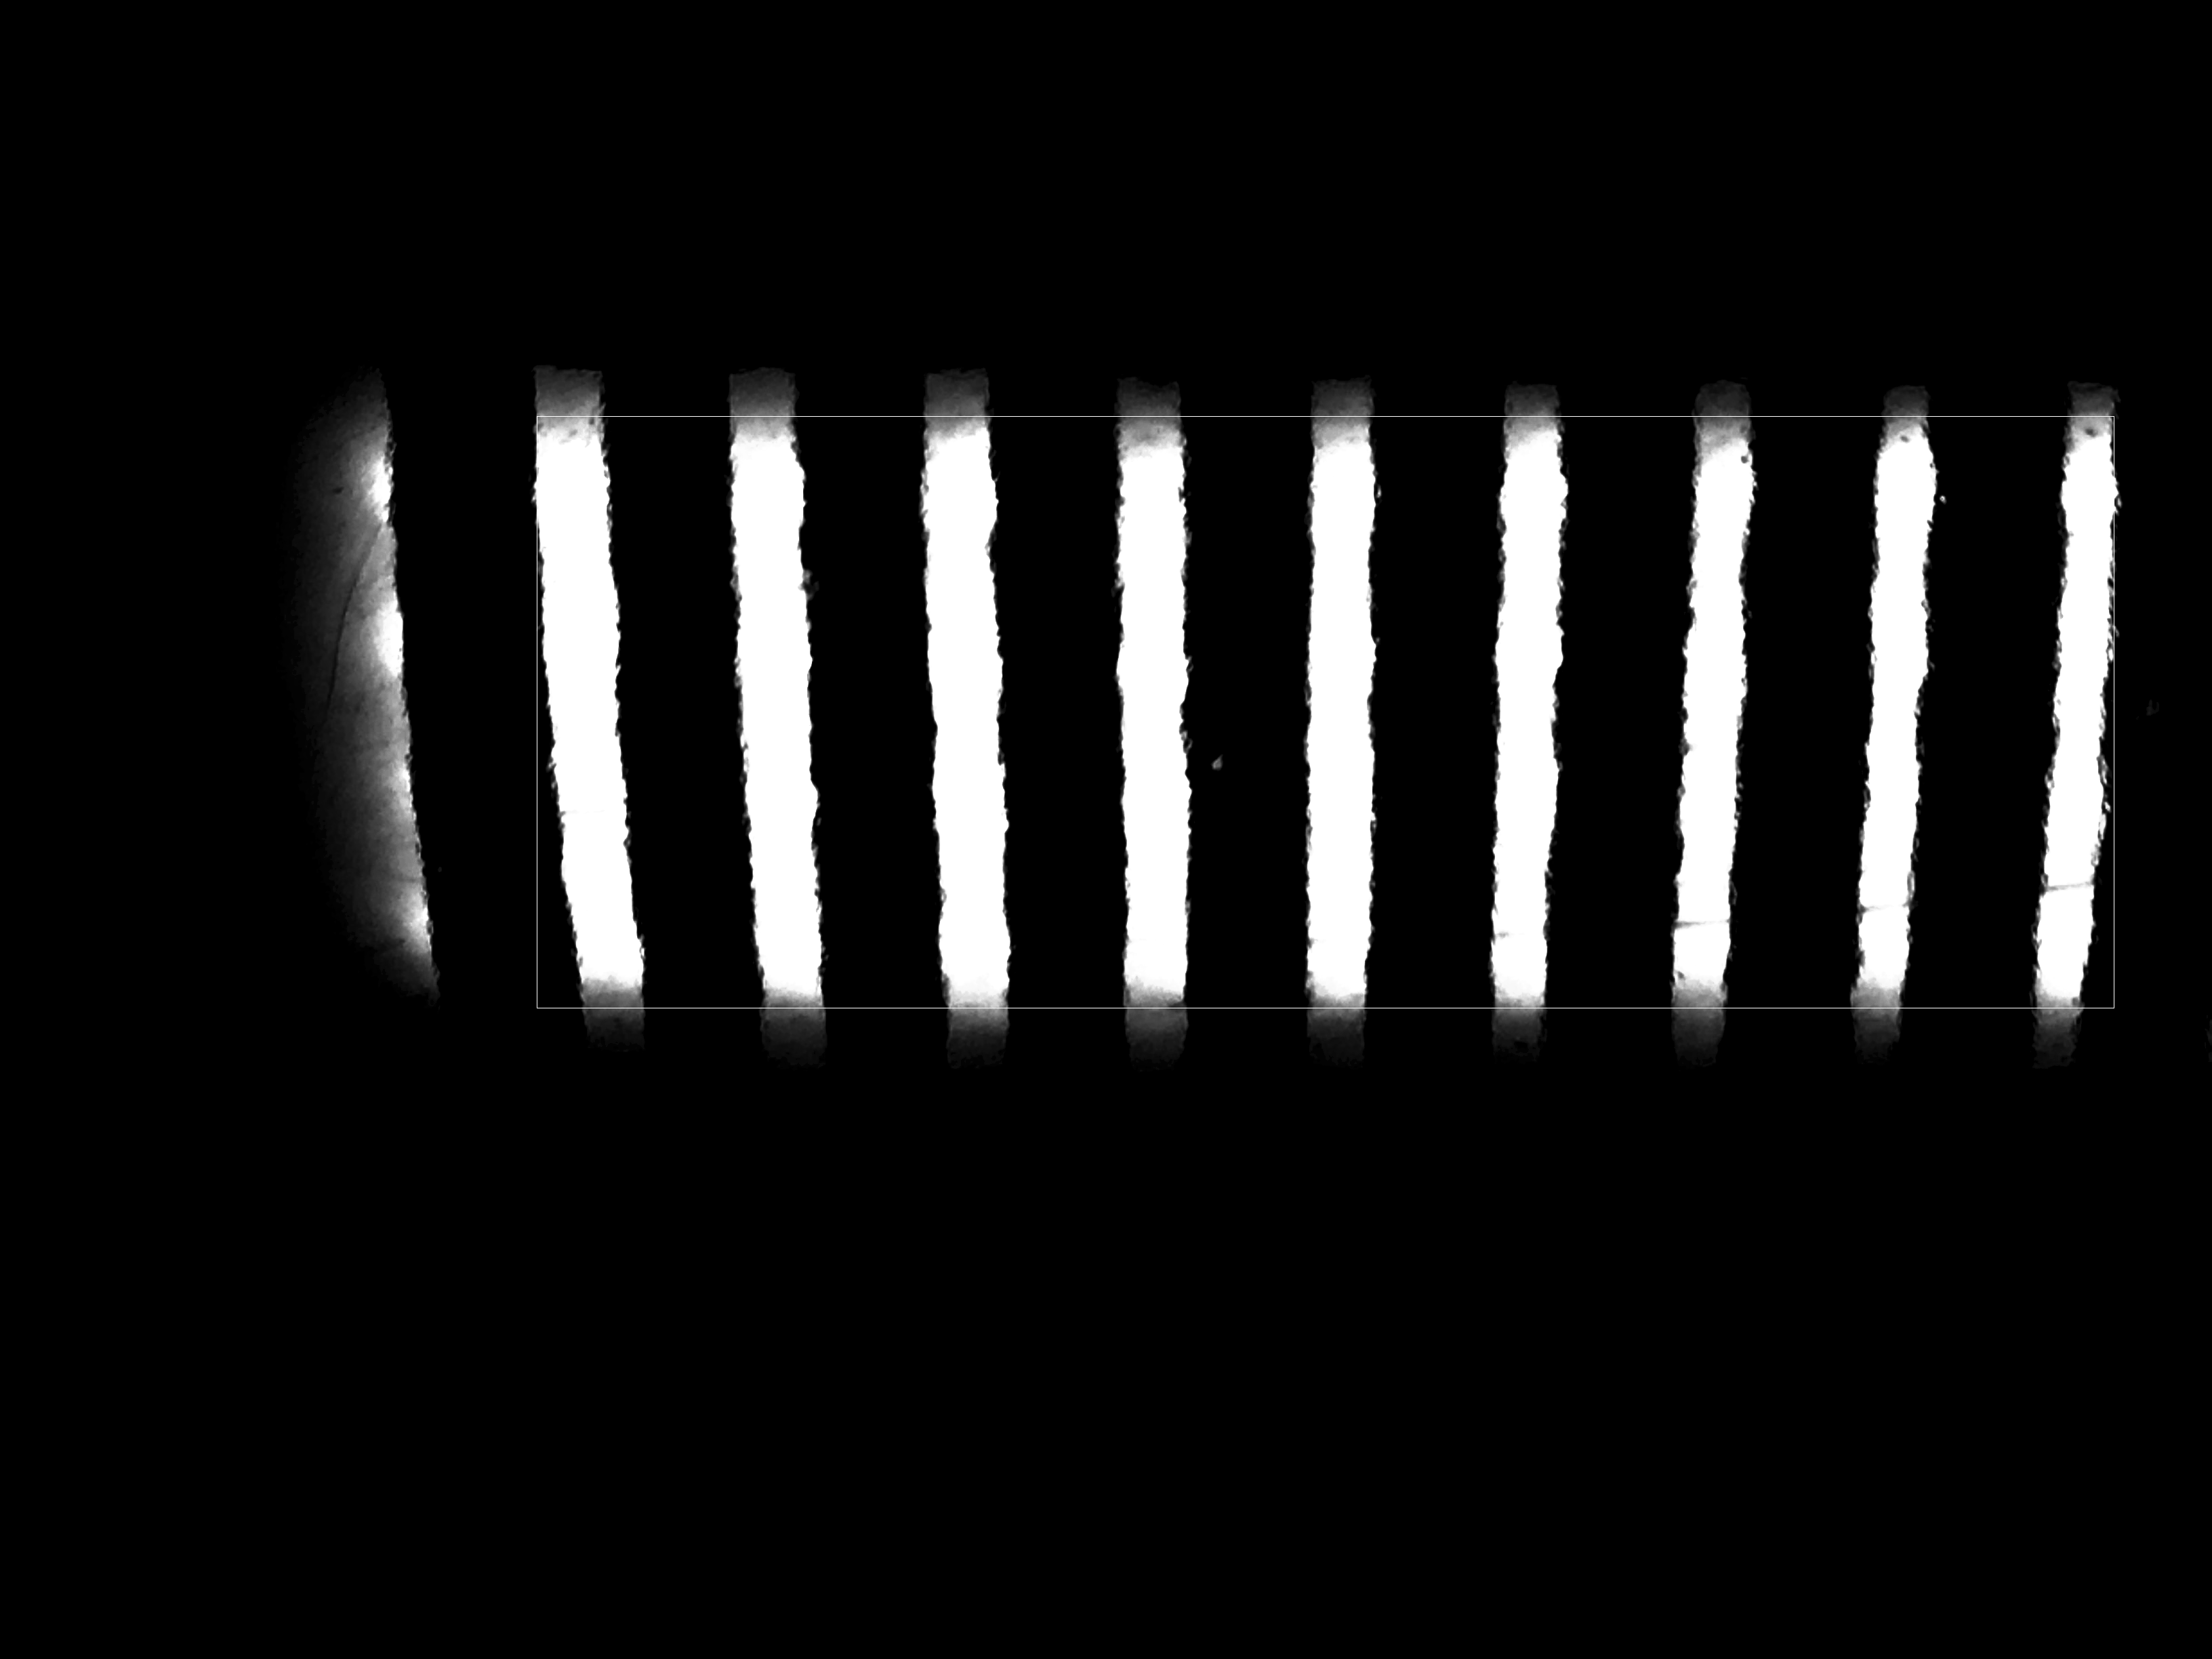

In [28]:
img_d.rectangle(rect, outline=256)
img_8c

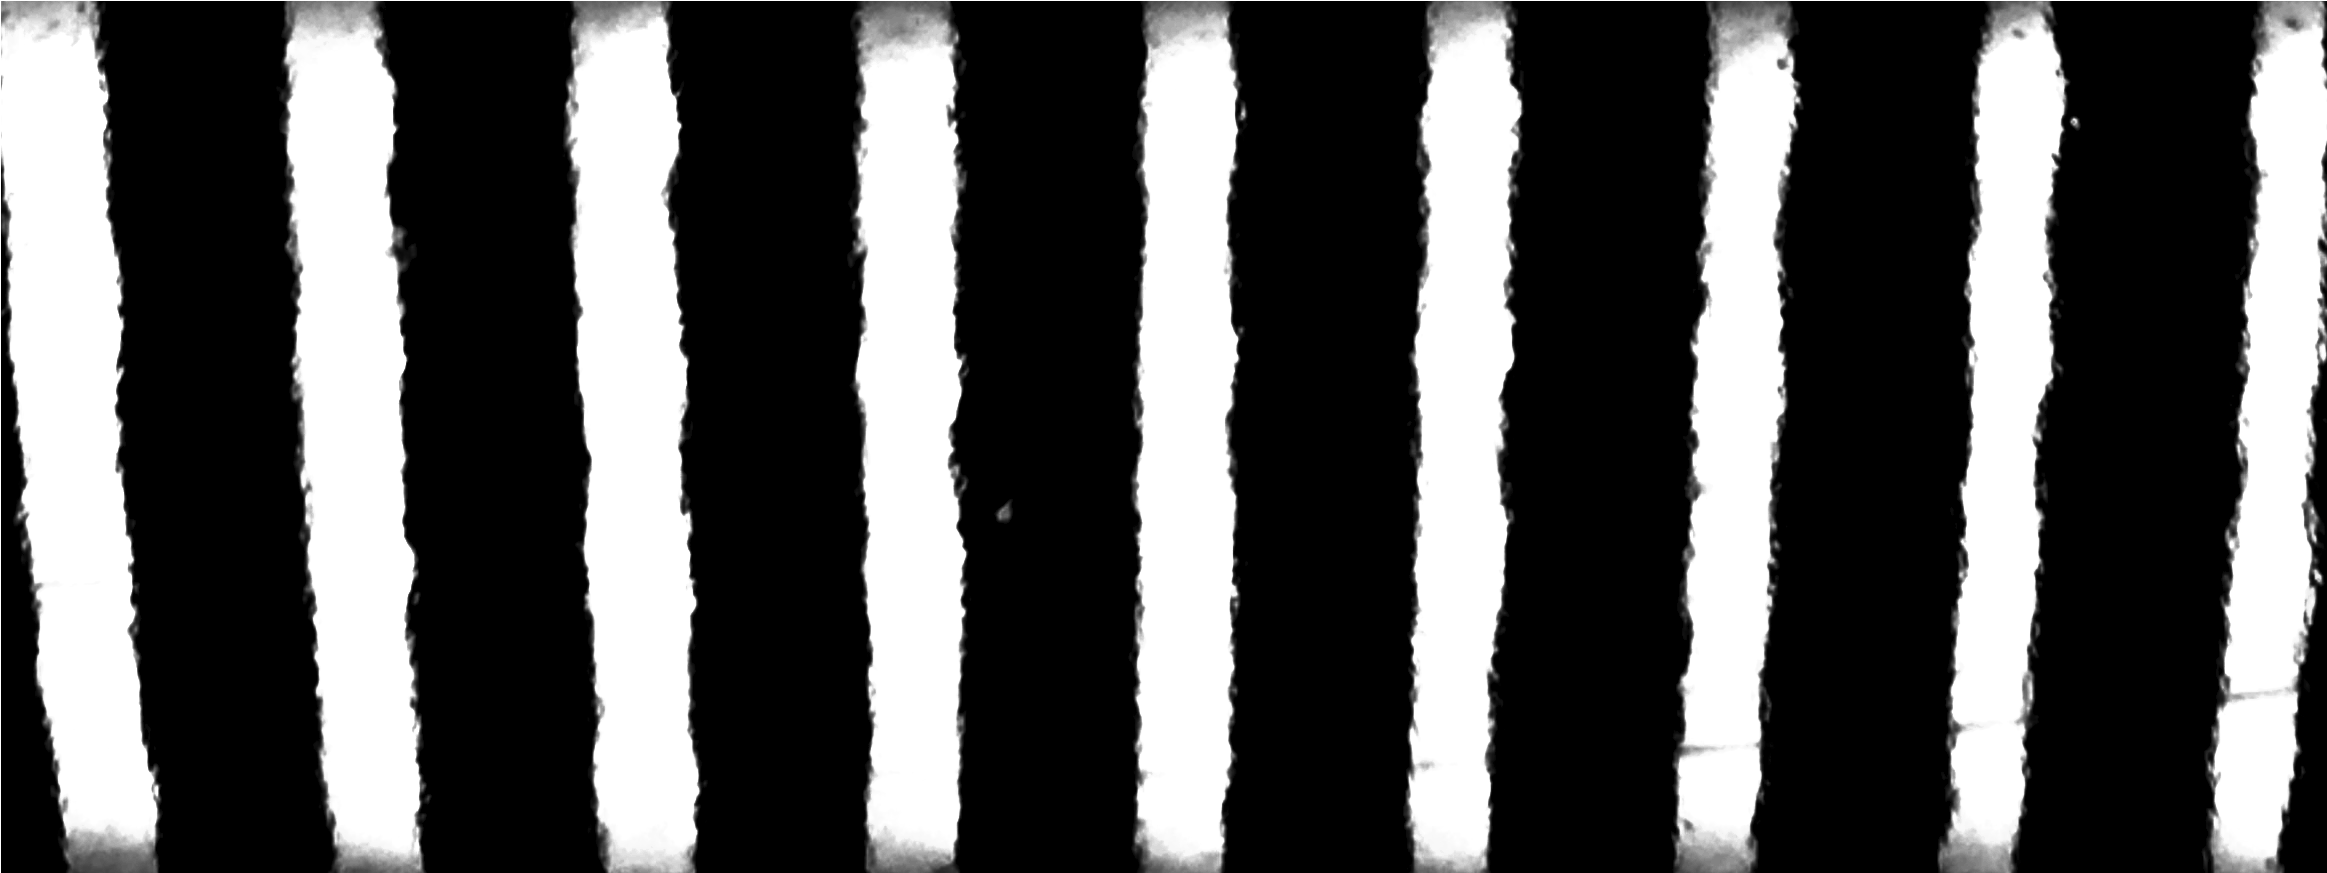

In [26]:
img_fin = img_8c.crop(rect)
img_fin

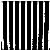

In [27]:
img_fin.resize((50,50))